In [108]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(r'C:\Users\martin.schoreisz\git\otv\otv\Transfert_Donnees')
sys.path.append(r'C:\Users\\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import pandas as pd
import geopandas as gp
import numpy as np
from shapely import wkt
import altair as alt
from altair import datum
from datetime import datetime
import csv, re, os, statistics, filecmp, unidecode
from math import sqrt, pi, exp
import Connexion_Transfert as ct
import Import_trafics as it
import Donnees_horaires as dh
import Visualisation as vi
import Outils

import Donnees_horaires as dh

import sqlalchemy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **EXEMPLE DE GRAPH HORAIRE** 
> vérifier la structure attributaire car changement de structure bdd

> ## **Visu de la répartition des données**
exemple horaire DIRA

In [3]:
#donnees
dira=it.Comptage_Dira(r'Q:\DAIT\TI\DREAL33\2020\OTV\Doc_travail\Donnees_source\DIRA\0_tmja_dira_par_section_20200106.ods',
                      r'Q:\DAIT\TI\DREAL33\2020\OTV\Doc_travail\Donnees_source\DIRA\0_Annee_Complete_2019',
                     '2019')
df_horaire=dira.miseEnFormeFeuille(pd.read_excel(os.path.join(dira.dossierAnneeComplete,'Ruffec_Trimestre_1_2019.xls'),sheet_name=None),
                                 'S_MBC16.G_1','gti_otv_pg11', 'na_2010_2019_p')

In [14]:
#stats
ecartType,moyenne,median,plageMin,plageMax=dh.statsHoraires(df_horaire,'h10_11')

In [78]:
def graphTrafHoraire(df_horaire, stats, attributHeure):
    ecartType,moyenne,median,plageMin,plageMax=stats
    chartTraf=alt.Chart(df_horaire.loc[(df_horaire['type_veh']=='VL')&(~df_horaire[attributHeure].isna())][['jour',attributHeure]].
                        sort_values(attributHeure),title=attributHeure).mark_point().encode(
                x='jour',
                y=alt.Y(attributHeure+':Q',axis=alt.Axis(title='Nb de vehicule')),
                tooltip='jour').interactive()

    chartStat=alt.Chart(pd.concat([df_horaire[['jour']].assign(val=v, typeVal=t) 
                                   for v,t in ((moyenne,'moyenne'),(median,'median'))])).mark_line().encode(
        x='jour',y='val',color='typeVal')

    intervalleConf=alt.Chart(df_horaire[['jour']].assign(plageMini=plageMin, plageMaxi=plageMax)).mark_area(opacity=0.3, color='yellow').encode(
            x='jour', 
            y=alt.Y('plageMini',axis=alt.Axis(title='Nb de vehicule')),
            y2='plageMaxi')

    return intervalleConf+chartTraf+chartStat

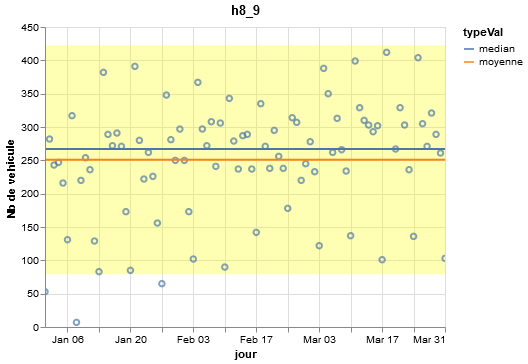

In [82]:
graphTrafHoraire(df_horaire,statsHoraires(df_horaire,'h8_9'),'h8_9')

In [81]:
alt.VConcatChart(vconcat=[alt.HConcatChart(hconcat=([graphTrafHoraire(df_horaire,statsHoraires(df_horaire,attributHeure),attributHeure) 
                           for attributHeure in [f'h{i+j}_{i+j+1}' for i in range(4)]])) for j in range(0,21,4)])

> ## **Visu de la répartition horaires des données en MJA et MJO**
exemple DIRA

In [3]:
with ct.ConnexionBdd('local_otv_boulot') as c:
    rqt="SELECT * FROM comptage.indic_horaire_id_comptag_annee('33-N230-37+346', '2019')"
    df=pd.read_sql(rqt,c.sqlAlchemyConn)

In [15]:
vi.GraphJourneeType(df,'33-N230-37+346')

alt.Chart(...)

In [13]:
dfTMJA,dfTMJO=dh.calculJourneeType(df)
dfVisu=vi.prepGraphJourneeType(dfTMJA,dfTMJO)

In [18]:
dfVisu#.iloc[6:19].nb_veh.mean()

,id_comptag,heure,nb_veh,type_jour
0,33-N230-37+346,2019-01-01 00:00:00,1438,tmja
1,33-N230-37+346,2019-01-01 01:00:00,1085,tmja
2,33-N230-37+346,2019-01-01 02:00:00,898,tmja
3,33-N230-37+346,2019-01-01 03:00:00,865,tmja
4,33-N230-37+346,2019-01-01 04:00:00,1115,tmja
5,33-N230-37+346,2019-01-01 05:00:00,1849,tmja
6,33-N230-37+346,2019-01-01 06:00:00,4224,tmja
7,33-N230-37+346,2019-01-01 07:00:00,5475,tmja
8,33-N230-37+346,2019-01-01 08:00:00,5476,tmja
9,33-N230-37+346,2019-01-01 09:00:00,6010,tmja


>## **Exemple de Graph sur une df horaire de la DIRCO**
pour comparer 2 sens de circu

In [10]:
fichierMja=r'Q:\DAIT\TI\DREAL33\2020\OTV\Doc_travail\Donnees_source\DIRCO\TMJA DIRCO-NA 2019_unfused.csv'
fichierMjM=r'Q:\DAIT\TI\DREAL33\2020\OTV\Doc_travail\Donnees_source\DIRCO\TMJM DIRCO-NA 2019.ods'
dossierHoraire=r'Q:\DAIT\TI\DREAL33\2020\OTV\Doc_travail\Donnees_source\DIRCO\données dirco'
dirco=it.Comptage_Dirco(fichierMja,fichierMjM,dossierHoraire,'2019')

dfFichierTmja=dirco.miseEnFormeFichierTmjaPourHoraire()
dfSc=dirco.miseEnFormeHoraire(dirco.tousFichierHoraires(dfFichierTmja))
dfScParSens,dicoCptok,dicoCptAssym=dirco.horaireParSens(dfSc)

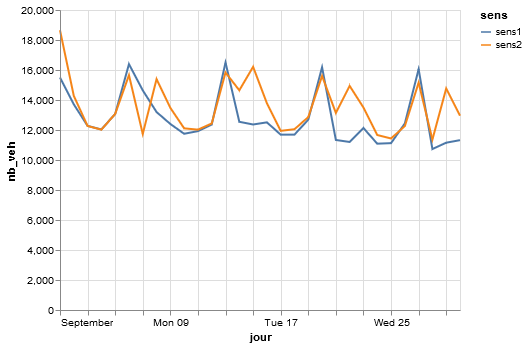

In [11]:
dh.graph2SensParJour(dicoCptok['19-A20-229+500'])

# ***ANALYSE GENERALE OTV***

In [99]:
#Pour info, obtenir un graph des trafic pour un point de comptage donnée
cpt1=vi.IdComptage('40-D934-24+160', qualite=True)#16-D1000-11+194
cpt1.graphTrafic()
cpt1.regressionTmja()
cpt1.chartTrafic|cpt1.chartRegressTmja

alt.HConcatChart(...)

> ## Analyse de la période de comptage

In [10]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('periode_comptage')

In [11]:
chart

alt.HConcatChart(...)

> ## Analyse de l'exhaustivite des données

In [143]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('exhaust_comptage')

In [146]:
chart

alt.HConcatChart(...)

> ## Analyse de la cohérence des comptage par fonction affine

In [154]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('coherence_affine_comptage')

In [155]:
chart

alt.HConcatChart(...)

> ## Analyse de la cohérence des comptage par comparaison evolution

In [156]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('coherence_evol_comptage')

In [157]:
chart

alt.HConcatChart(...)

> ## Analyse de la cohérence des comptage par comparaison evolution & par fonction affine

In [168]:
otv=vi.Otv()
tableauCoherence=otv.tableauEcartCoherencesComptages()
chart, chart1, chart2=otv.graphQualiteComptages('coherence_comptage')

In [170]:
tableauCoherence

txt_evolution,NC,faible,moyenne,bonne
txt_fonction_affine,,,,
NC,12089.0,0.0,0.0,0.0
faible,478.0,1077.0,427.0,217.0
moyenne,2598.0,500.0,696.0,412.0
bonne,0.0,407.0,2158.0,5542.0


In [171]:
chart

> ## ***Qualite finale des comptages***

In [33]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('qualite_comptage')

In [34]:
chart

alt.HConcatChart(...)

> ## ***Analyse du nombre d'année distincte de comptage en fonction du type de poste***

In [27]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('densite_compteur')

In [28]:
chart

alt.HConcatChart(...)

> ## ***Analyse de la fiabilite de la goelocalisation d'un compteur***

In [18]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('fiabilite_geo_compteur')

In [19]:
chart

alt.HConcatChart(...)

> ## ***Cohérence de l'ensemble des comptages d'un compteur***
cf [chap 2](#2) pour rappell

In [25]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('coherence_compteur')

In [26]:
chart

alt.HConcatChart(...)

> ## ***Qualité finale des compteurs***

In [31]:
otv=vi.Otv()
chart, chart1, chart2=otv.graphQualiteComptages('qualite_compteur')

In [32]:
chart

alt.HConcatChart(...)

# **Graphs Valorisation** 
> production de graphs test en juillet 2022

## **Graphs bruit**

In [1]:
# récupération des données depuis la basee de données de test
with ct.ConnexionBdd('test_valorisation') as c:
    dfGraphEmission = pd.read_sql('select * from donnees_produites.resultats_source_graphiques', c.sqlAlchemyConn)
# définition des variables
id_comptag = '16-D10-40+170'
annee = 2019
titre = ['Emission de bruit pour le comptage', f'{id_comptag} ; annee {annee}']
# création du graphique
chart = alt.Chart(dfGraphEmission.loc[dfGraphEmission.id_comptag == id_comptag], title=titre).mark_line().encode(
    x=alt.X('distance', title='distance (km)'),
    y=alt.Y('emission_bruit_6_22', title='Niveau d\'emission de bruit (dB(A))',
            scale=alt.Scale(domainMin=dfGraphEmission.loc[dfGraphEmission.id_comptag == id_comptag].emission_bruit_6_22.min()-3,
                            domainMax=dfGraphEmission.loc[dfGraphEmission.id_comptag == id_comptag].emission_bruit_6_22.max()+3)))

NameError: name 'ct' is not defined

In [22]:
chart

alt.Chart(...)

## **Graphs profil public**

In [139]:
# params
largeur=300
hauteur=200
id_comptag = '16-D1000-11+194'
indic = ['tmja', 'pc_pl']
rqtAgrege = f"""
      SELECT c.annee, ia.valeur, ia.indicateur FROM valorisation.comptage c JOIN valorisation.indic_agrege ia ON ia.id_comptag_uniq = c.id
      WHERE ia.indicateur = any(ARRAY{indic}) AND c.id_comptag = '{id_comptag}'
      """
id_comptag_trou = '79-D748-28+500'
indicTrou = ['tmja']
rqtAgregeTrou =  f"""
      SELECT c.annee, ia.valeur, ia.indicateur FROM valorisation.comptage c JOIN valorisation.indic_agrege ia ON ia.id_comptag_uniq = c.id
      WHERE ia.indicateur = any(ARRAY{indicTrou}) AND c.id_comptag = '{id_comptag_trou}'
      """
# import donnees
with ct.ConnexionBdd('local_otv_boulot') as c:
    dfGraphAgrege = pd.read_sql(rqtAgrege, c.sqlAlchemyConn)
    dfGraphAgregeTrou = pd.read_sql(rqtAgregeTrou, c.sqlAlchemyConn)
    
titreAgrege = alt.TitleParams([f'compteur {id_comptag}'], fontSize = 14)
titreAgregeTrou = alt.TitleParams([f'compteur {id_comptag_trou}'], fontSize = 14)

couleurY2 = 'green'
yMinPcPl = dfGraphAgrege.loc[dfGraphAgrege.indicateur == 'pc_pl'].valeur.min() - 2
yMaxPcPl = dfGraphAgrege.loc[dfGraphAgrege.indicateur == 'pc_pl'].valeur.min() + 2

# creation Chart
chartAgrege = (alt.Chart(dfGraphAgrege, title=titreAgrege).mark_line(point=True).encode(
    x=alt.X('annee:O'),
    y=alt.Y('valeur', title='tmja')).transform_filter(
    (datum.indicateur == 'tmja')) + (alt.Chart(dfGraphAgrege, title=titreAgrege).mark_line(color=couleurY2, point=True).encode(
        x='annee:O',
        y=alt.Y('valeur',
                scale=alt.Scale(domain=[yMinPcPl, yMaxPcPl]),
                axis=alt.Axis(title = 'pc_pl', labelColor=couleurY2, titleColor=couleurY2, tickColor=couleurY2))).transform_filter(
        (datum.indicateur == 'pc_pl'))) + 
                  (alt.Chart(dfGraphAgrege, title=titreAgrege).mark_circle(color=couleurY2).encode(
                      x='annee:O',
                      y=alt.Y('valeur',
                              scale=alt.Scale(domain=[yMinPcPl, yMaxPcPl]),
                              axis=alt.Axis(title = 'pc_pl', labelColor=couleurY2, titleColor=couleurY2, tickColor=couleurY2))).transform_filter(
                      (datum.indicateur == 'pc_pl')))).resolve_scale(y='independent').properties(width=largeur, height=hauteur)
chartAgrege

alt.LayerChart(...)

In [137]:
# cas de données à trou
dfIndicComplete = dfGraphAgregeTrou.copy()
dfIndicComplete.annee = dfIndicComplete.annee.apply(lambda x: datetime.strptime(x, '%Y'))
domainDate = [e for e in range(dfIndicComplete.annee.min().year, dfIndicComplete.annee.max().year + 1)]
(alt.Chart(dfGraphAgregeTrou, title=id_comptag_trou).mark_bar().encode(
    x=alt.X('annee:O'),
    y=alt.Y('valeur', title='tmja')).transform_filter(
    (datum.indicateur == 'tmja')).properties(width=largeur, height=hauteur) | 
 alt.Chart(dfIndicComplete, title=id_comptag_trou).mark_bar().encode(
    x=alt.X('year(annee):T', title='Annee', scale=alt.Scale(domain=domainDate), axis=alt.Axis(labelOffset=40)),
    y=alt.Y('valeur', title='tmja')).transform_filter(
    (datum.indicateur == 'tmja')).properties(width=largeur, height=hauteur))

alt.HConcatChart(...)

In [142]:
# cas simple avec 1 seul indic
alt.Chart(dfGraphAgrege, title=titreAgrege).mark_bar().encode(
    x=alt.X('annee:O'),
    y=alt.Y('valeur', title='tmja')).transform_filter(
    (datum.indicateur == 'tmja')).properties(width=largeur, height=hauteur)

alt.Chart(...)

In [49]:
# export donnees source
dfGraphAgrege.to_json(r'C:\Users\martin.schoreisz\Box\Cerema\3C-Prod_Mob\C4-ITS_Trafics_Regulation-Productions\C41-Connaissance_trafics_routiers\2022-QAE-Evol_OTR\4-Travaux_en_cours\Expression_Besoin\Projet_Valorisation\exemples_graphs\chartAgrege_data.json')

## **Graphs mensuels profil gestionnaire**

In [143]:
# params
id_comptag = '33-A630-14+23'
annee = '2019'
indic = ['tmja', 'pc_pl']
rqtMensuel = f"""
      SELECT im.mois, im.indicateur, im.valeur  FROM valorisation.comptage c JOIN valorisation.indic_mensuel im ON im.id_comptag_uniq = c.id
      WHERE im.indicateur = any(array{indic}) AND c.id_comptag = '{id_comptag}' AND c.annee = '{annee}'
      """
titreMensuel = [f'compteur {id_comptag} ; ', f'annee {annee}']
couleurY2 = 'green'
yMinPcPl = dfGraphAgrege.loc[dfGraphAgrege.indicateur == 'pc_pl'].valeur.min() - 2
yMaxPcPl = dfGraphAgrege.loc[dfGraphAgrege.indicateur == 'pc_pl'].valeur.min() + 2
listMois = ['janv', 'fevr', 'mars', 'avri', 'mai', 'juin', 'juil', 'aout', 'sept', 'octo', 'nove', 'dece']

# import donnees
with ct.ConnexionBdd('local_otv_boulot') as c:
    dfGraphMensuel = pd.read_sql(rqtMensuel, c.sqlAlchemyConn)

# creation Chart
chartMensuel = (alt.Chart(dfGraphMensuel, title=titreMensuel).mark_line(point=True).encode(
    x=alt.X('mois:O', sort=listMois),
    y=alt.Y('valeur', title='tmja')).transform_filter(
    (datum.indicateur == 'tmja')) + (
    alt.Chart(dfGraphMensuel, title=titreMensuel).mark_line(color=couleurY2).encode(
        x=alt.X('mois:O', sort=listMois),
        y=alt.Y('valeur', 
        scale=alt.Scale(domain=[yMinPcPl, yMaxPcPl]),
        axis=alt.Axis(title = 'pc_pl', labelColor=couleurY2, titleColor=couleurY2, tickColor=couleurY2))).transform_filter(
        (datum.indicateur == 'pc_pl'))) + (
    alt.Chart(dfGraphMensuel, title=titreMensuel).mark_circle(color=couleurY2).encode(
        x=alt.X('mois:O', sort=listMois),
        y=alt.Y('valeur', 
        scale=alt.Scale(domain=[yMinPcPl, yMaxPcPl]),
        axis=alt.Axis(title = 'pc_pl', labelColor=couleurY2, titleColor=couleurY2, tickColor=couleurY2))).transform_filter(
        (datum.indicateur == 'pc_pl')))).resolve_scale(y='independent')
chartMensuel.properties(width=largeur, height=hauteur)

alt.LayerChart(...)

In [144]:
alt.Chart(dfGraphMensuel, title=titreMensuel).mark_bar().encode(
    x=alt.X('mois:O', sort=listMois),
    y=alt.Y('valeur', title='tmja')).transform_filter(
    (datum.indicateur == 'tmja')).properties(width=largeur, height=hauteur)

alt.Chart(...)

In [52]:
# export donnees source
dfGraphMensuel.to_json(r'C:\Users\martin.schoreisz\Box\Cerema\3C-Prod_Mob\C4-ITS_Trafics_Regulation-Productions\C41-Connaissance_trafics_routiers\2022-QAE-Evol_OTR\4-Travaux_en_cours\Expression_Besoin\Projet_Valorisation\exemples_graphs\chartMensuel_data.json')

## **Graphs horaire profil gestionnaire**

In [145]:
# params
id_comptag = '33-A630-23+0'
annee = '2019'
indic = ['MJA_VL', 'MJO_VL']
rqtHoraire = f"""
      SELECT ih.indicateur, ih.h0_1, ih.h1_2, ih.h2_3, ih.h3_4, ih.h4_5, ih.h5_6, ih.h6_7, ih.h7_8, ih.h8_9, ih.h9_10, ih.h10_11, 
       ih.h11_12, ih.h12_13, ih.h13_14, ih.h14_15, ih.h15_16, ih.h16_17, ih.h17_18, ih.h18_19, ih.h19_20, ih.h20_21, ih.h21_22, 
       ih.h22_23, ih.h23_24  FROM valorisation.comptage c JOIN valorisation.indic_horaire ih ON ih.id_comptag_uniq = c.id
      WHERE ih.indicateur =ANY(ARRAY{indic}) AND c.id_comptag = '{id_comptag}' AND c.annee = '{2019}' 
      """
titreHoraire = [f'compteur {id_comptag} ; ', f'annee {annee}']
couleurY2 = 'green'
yMinPcPl = dfGraphAgrege.loc[dfGraphAgrege.indicateur == 'pc_pl'].valeur.min() - 2
yMaxPcPl = dfGraphAgrege.loc[dfGraphAgrege.indicateur == 'pc_pl'].valeur.min() + 2
listHeure = ['h0_1', 'h1_2', 'h2_3', 'h3_4', 'h4_5', 'h5_6', 'h6_7', 'h7_8', 'h8_9', 'h9_10', 'h10_11',
             'h11_12', 'h12_13', 'h13_14', 'h14_15', 'h15_16', 'h16_17', 'h17_18', 'h18_19', 'h19_20', 'h20_21', 'h21_22',
             'h22_23', 'h23_24']

# import donnees
with ct.ConnexionBdd('local_otv_boulot') as c:
    dfGraphHoraire = pd.read_sql(rqtHoraire, c.sqlAlchemyConn)
    dfGraphHoraire = dfGraphHoraire.melt(id_vars='indicateur', value_vars=listHeure, var_name='heure', value_name='nb_veh')

# creation Chart
chartHoraire = alt.Chart(dfGraphHoraire, title=titreHoraire).mark_line(point=True).encode(
    x=alt.X('heure:N', sort=listHeure),
    y=alt.Y('nb_veh:Q', title='MJA_VL ; MJO_VL'),
    color='indicateur:N')
chartHoraire.properties(width=largeur, height=hauteur)

alt.Chart(...)

In [54]:
# export donnees source
dfGraphHoraire.to_json(r'C:\Users\martin.schoreisz\Box\Cerema\3C-Prod_Mob\C4-ITS_Trafics_Regulation-Productions\C41-Connaissance_trafics_routiers\2022-QAE-Evol_OTR\4-Travaux_en_cours\Expression_Besoin\Projet_Valorisation\exemples_graphs\chartHoraire_data.json')

In [146]:
alt.Chart(dfGraphHoraire, title=titreHoraire).mark_bar().encode(
    x=alt.X('heure:N', sort=listHeure),
    y=alt.Y('nb_veh:Q', title='MJA_VL ; MJO_VL')).transform_filter(
    (datum.indicateur == 'MJA_VL')).properties(width=largeur, height=hauteur)

alt.Chart(...)